# Pymaceuticals Inc.
___

### Analysis



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print(f"Mouse file columns are: {mouse_metadata.columns}")
#print(f"Study results columns are: {study_results.columns}")
#print(mouse_metadata["Mouse ID"].value_counts())
#print(study_results["Mouse ID"].value_counts())


# Combine the data into a single DataFrame
main_data_df = pd.merge(mouse_metadata, study_results, how = 'inner', on = "Mouse ID")

# Display the data table for preview
main_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
main_data_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(main_data_df[["Mouse ID", "Timepoint"]].value_counts())

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64


In [4]:
#duplicate = main_data_df[["Mouse ID", "Timepoint"]].value_counts() > 1
#duplicate.head()

In [5]:
duplicate_rows = main_data_df[main_data_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]

In [6]:
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
wrong_data = main_data_df[main_data_df["Mouse ID"] == "g989"]
print(wrong_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = main_data_df[main_data_df["Mouse ID"] != "g989"]

In [9]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [12]:
drug_regimen_group = cleaned_df.groupby(["Drug Regimen"])

mean_tumor = drug_regimen_group["Tumor Volume (mm3)"].mean()
mean_tumor

median_tumor = drug_regimen_group["Tumor Volume (mm3)"].median()
median_tumor

var_tumor = drug_regimen_group["Tumor Volume (mm3)"].var()
var_tumor

stdev_tumor = drug_regimen_group["Tumor Volume (mm3)"].std()
stdev_tumor

sem_tumor = drug_regimen_group["Tumor Volume (mm3)"].sem()
sem_tumor

tumor_summary_dataframe = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                        "Median Tumor Volume": median_tumor,
                                        "Tumor Volume Variance": var_tumor,
                                        "Tumor Volume Std. Dev.": stdev_tumor,
                                        "Tumor Volume Std. Err.": sem_tumor})
tumor_summary_dataframe


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
aggregate

/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_21143/2983325764.py:6: FutureWarning: The provided callable <function mean at 0x104d56160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_21143/2983325764.py:6: FutureWarning: The provided callable <function median at 0x104e8a200> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_21143/2983325764.py:6: FutureWarning: The provided callable <function var a

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

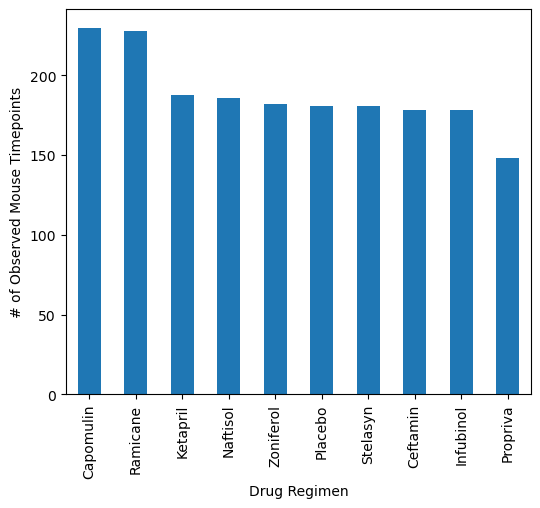

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_timepoint=cleaned_df.groupby(["Drug Regimen"]).count()["Timepoint"]
bar_df = pd.DataFrame(drug_timepoint)
bar_df = bar_df.sort_values("Timepoint", ascending = False)


bar_plot_pd = bar_df.plot(kind = "bar", legend = False, figsize = (6,5))
bar_plot_pd.set_xlabel("Drug Regimen")
bar_plot_pd.set_ylabel("# of Observed Mouse Timepoints")
#plt.savefig('bar_plot_pd.png')
plt.show()
#plt.tight_layout()

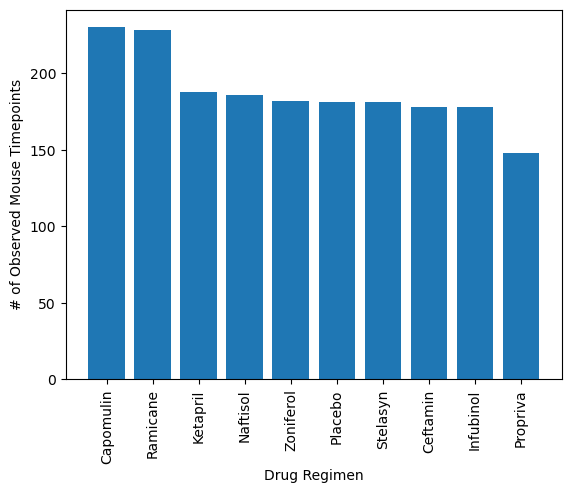

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#reset index so that drug regimen can be called as a column later

bar_df = bar_df.reset_index()

#Create the x and y axis
x_axis = np.arange(len(bar_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_df["Drug Regimen"], rotation = 90)
y_axis = bar_df['Timepoint']

#Plot the graph
bar_plot_mat = plt.bar(x_axis, y_axis, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


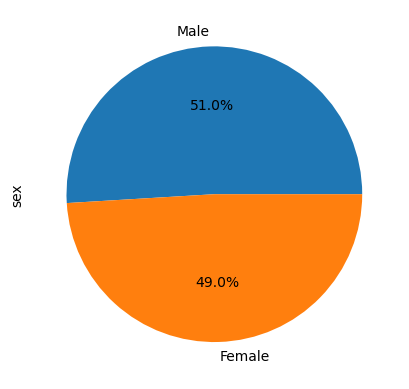

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Generate the data
sex_data = pd.DataFrame(cleaned_df['Sex'].value_counts())
total_mice = sex_data["count"].sum()
percent_male = sex_data.iloc[0,0]/total_mice * 100
percent_female = sex_data.iloc[1,0]/total_mice * 100

percent_list = [percent_male, percent_female]
percent_list

sex_data["Percent"] = percent_list
sex_data

pie_pd = sex_data.plot(kind = "pie", y = "Percent", autopct='%1.1f%%', legend = False)
pie_pd.set_ylabel("sex")
plt.show()

#sex_count = cleaned_df.groupby(['Sex']).count()["Mouse ID"]
#sex_count = sex_count.reset_index()
#type(sex_count)
#sex_count.plot(kind='pie', x = 'Mouse ID', y = 'Sex', autopct='%1.0f%%')
#cleaned_df.groupby(['Sex']).count().plot(kind='pie', x = Sy = 'Mouse ID', autopct='%1.0f%%') 

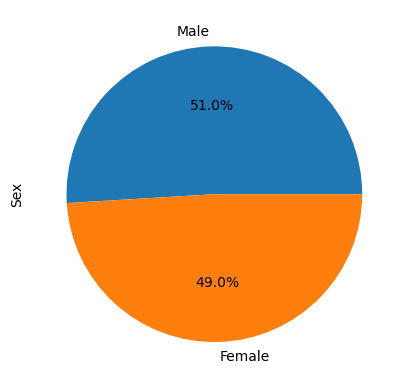

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Use data from above
sex_data
labels = ["Male", "Female"]

#Generate the plot
plt.pie(sex_data["Percent"], labels = labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_time_df = pd.DataFrame(cleaned_df.groupby("Mouse ID").max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_time_df2 = pd.merge(mouse_max_time_df, cleaned_df, how = 'inner', on = ["Timepoint", "Mouse ID"])

mouse_time_df2.shape

(248, 8)

In [19]:
mouse_time_df2.head(50)

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
5,45,a401,Zoniferol,Female,8,25,66.794156,4
6,45,a411,Ramicane,Male,3,22,38.407618,1
7,45,a444,Ramicane,Female,10,25,43.047543,0
8,10,a457,Ketapril,Female,11,30,49.783419,0
9,45,a492,Stelasyn,Male,20,25,60.122011,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_type = mouse_time_df2.loc[mouse_time_df2["Drug Regimen"] == treatment, :]
    tumor_volume.append(treatment_type["Tumor Volume (mm3)"])
    print(f"List of tumor volumes for {treatment} is: {tumor_volume}")
    #Calculate quantiles for IQR:
    tumor_vol_quantile = treatment_type["Tumor Volume (mm3)"].quantile([.25, .5,.75])
    lowerq = tumor_vol_quantile[0.25]
    upperq = tumor_vol_quantile[0.75]
    iqr = upperq - lowerq
    print(f"Treatment is {treatment} and its IQR is  {iqr}")
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    tumor_volume =[]
    
    
    


List of tumor volumes for Capomulin is: [19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64]
Treatment is Capomulin and its IQR is  7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
List of tumor volumes for Ramicane is: [6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.56

ValueError: X must have 2 or fewer dimensions

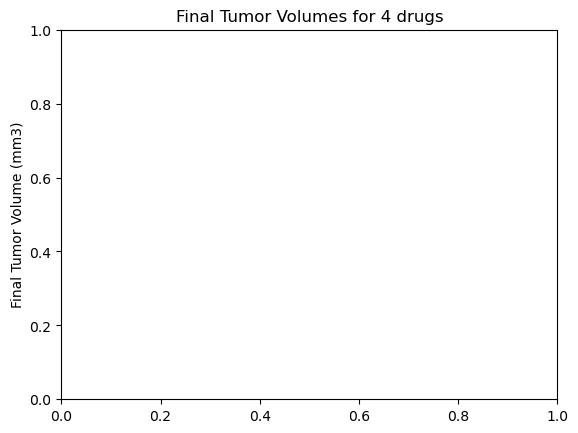

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulin_tumors = []
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
capomulin_tumors.append(capomulin["Tumor Volume (mm3)"])
#print(capomulin_tumors)

ramicane_tumors = []
ramicane = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
ramicane_tumors.append(ramicane["Tumor Volume (mm3)"])
#print(ramicane_tumors)

infubinol_tumors = []
infubinol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
infubinol_tumors.append(infubinol["Tumor Volume (mm3)"])
#infubinol_tumors

ceftamin_tumors = []
ceftamin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "ceftamin", :]
ceftamin_tumors.append(ceftamin["Tumor Volume (mm3)"])
#ceftamin_tumors

tumor_data_boxplot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for 4 drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_data_boxplot)
plt.show()

## Line and Scatter Plots

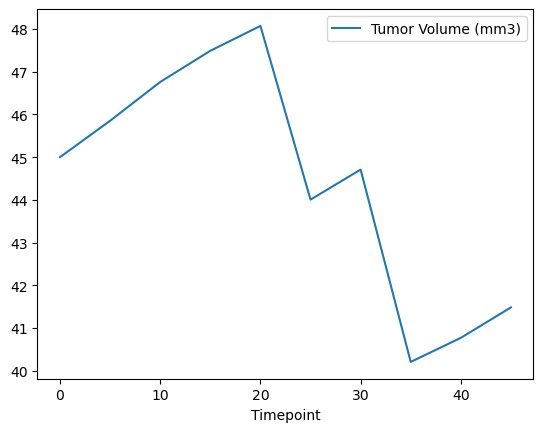

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
i509 = capomulin.loc[capomulin["Mouse ID"] == "l509", :]
i509
mouse_tumor_line = i509.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)")

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
capomulin_groupby = capomulin.groupby(["Weight (g)"])
capomulin_avg_tumor = capomulin_groupby["Tumor Volume (mm3)"].mean()
plt.scatter(capomulin_avg_tumor)

TypeError: scatter() missing 1 required positional argument: 'y'

In [33]:
print(capomulin_avg_tumor)
pd.DataFrame

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64


In [ ]:
capomulin = mouse_time_df2.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
capomulin_groupby = capomulin.groupby(["Weight (g)"])
capomulin_avg_tumor = capomulin_groupby["Tumor Volume (mm3)"]
plt.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])

In [36]:
type(capomulin_avg_tumor)

pandas.core.series.Series

In [37]:
capomulin_df = pd.DataFrame(capomulin_avg_tumor)

In [38]:
capomulin_df

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109
